# Combining ISEAR and GoEmotions for Emotion Classification

This notebook demonstrates how to merge the **ISEAR** and **GoEmotions** datasets to create a comprehensive emotion classification dataset. Using this combined dataset, we will train and evaluate multiple classifiers without addressing class imbalance issues.

### Key Highlights:
- **Dataset Preparation:**
  - Load and preprocess the ISEAR and GoEmotions datasets.
  - Combine the datasets into a single unified dataset.
  - Explore and visualize the distribution of emotions across both datasets.

- **Feature Engineering:**
  - Convert text into numerical features using the TF-IDF Vectorizer.

- **Model Training and Evaluation:**
  - Train four different classifiers:
    - Logistic Regression
    - Naive Bayes
    - Random Forest
    - Decision Tree
  - Evaluate the models using accuracy, classification reports, and confusion matrices.

- **Visualization:**
  - Compare emotion distributions.
  - Analyze confusion matrices and model accuracies.

This notebook provides a foundation for working with emotion classification tasks, allowing me to analyze and compare classifier performance on a multi-dataset emotion classification problem.


# Step1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 2: Load the datasets

## ISEAR Dataset

In [ ]:
# Load the datasets
isear_df = pd.read_csv('ISEAR_Cleaned.csv')

# Select only the EMOTION and cleaned_text columns from each dataset
isear_selected = isear_df[['EMOTION', 'cleaned_text']]

# Display the first few rows to verify the selection
print("ISEAR Dataset:")
print(isear_selected.head(5))

# Display the number of values (rows) in each dataset
print("\nISEAR Dataset - Number of rows:", isear_selected.shape[0])
print("ISEAR Dataset - Number of columns:", isear_selected.shape[1])

# Check for null values in each dataset
print("\n--- Null Values in ISEAR_Cleaned.csv ---")
print(isear_selected.isnull().sum())


ISEAR Dataset:
   EMOTION                                       cleaned_text
0      joy  day feel close partner friends. feel peac also...
1     fear  everi time imagin someon love could contact se...
2    anger        obvious unjustli treat possibl elucid this.
3  sadness  think short time live relat period life think ...
4  disgust  gather found involuntarili sit next two peopl ...

ISEAR Dataset - Number of rows: 7516
ISEAR Dataset - Number of columns: 2

--- Null Values in ISEAR_Cleaned.csv ---
EMOTION         0
cleaned_text    0
dtype: int64


## Go Emotions Dataset

In [ ]:
go_emotions_df = pd.read_csv('/content/Go_Emotions_11_Emotions_Cleaned.csv')

go_emotions_selected = go_emotions_df[['EMOTION', 'cleaned_text']]

print("\nGoEmotions Dataset:")
print(go_emotions_selected.head(5))

print("\nGoEmotions Dataset - Number of rows:", go_emotions_selected.shape[0])
print("GoEmotions Dataset - Number of columns:", go_emotions_selected.shape[1])

print("\n--- Null Values in Go_Emotions_Cleaned.csv ---")
print(go_emotions_selected.isnull().sum())


GoEmotions Dataset:
   EMOTION                                       cleaned_text
0      joy                   favourit food anyth cook myself.
1      joy  himself, everyon think he laugh screw peopl in...
2  sadness                                   fuck bayless iso
3  boredom                                 make feel threaten
4    anger                              dirti southern wanker

GoEmotions Dataset - Number of rows: 54263
GoEmotions Dataset - Number of columns: 2

--- Null Values in Go_Emotions_Cleaned.csv ---
EMOTION          0
cleaned_text    18
dtype: int64


In [ ]:
# Remove rows with null values in the 'cleaned_text' column
go_emotions_selected = go_emotions_selected.dropna(subset=['cleaned_text'])

<ipython-input-5-a2dab8018e09>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=isear_emotion_counts.index, y=isear_emotion_counts.values, ax=axes[0], palette="viridis")
<ipython-input-5-a2dab8018e09>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=go_emotions_emotion_counts.index, y=go_emotions_emotion_counts.values, ax=axes[1], palette="plasma")


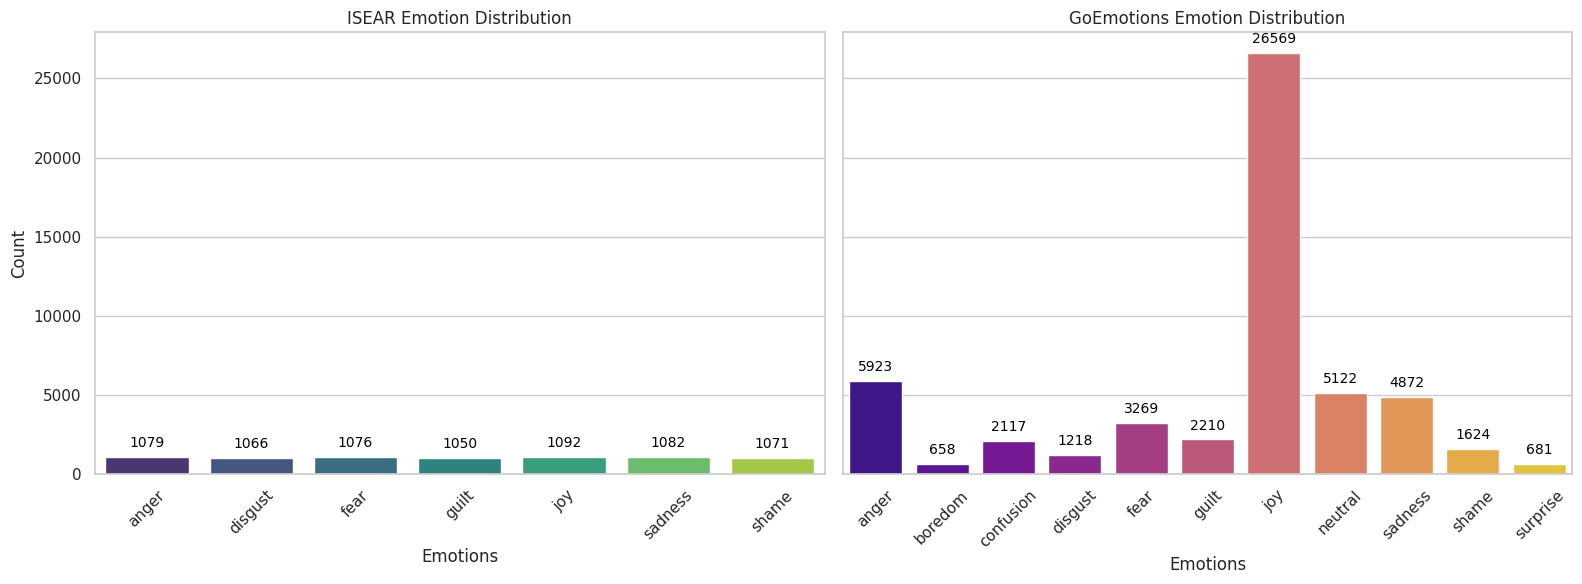

In [ ]:
# Set up the plot style
sns.set(style="whitegrid")

# Create subplots for each dataset
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Count and plot emotions in the ISEAR dataset
isear_emotion_counts = isear_df['EMOTION'].value_counts().sort_index()
sns.barplot(x=isear_emotion_counts.index, y=isear_emotion_counts.values, ax=axes[0], palette="viridis")
axes[0].set_title("ISEAR Emotion Distribution")
axes[0].set_xlabel("Emotions")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add labels to each bar in ISEAR plot
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     xytext=(0, 5),
                     textcoords='offset points', fontsize=10, color='black')

# Count and plot emotions in the GoEmotions dataset
go_emotions_emotion_counts = go_emotions_df['EMOTION'].value_counts().sort_index()
sns.barplot(x=go_emotions_emotion_counts.index, y=go_emotions_emotion_counts.values, ax=axes[1], palette="plasma")
axes[1].set_title("GoEmotions Emotion Distribution")
axes[1].set_xlabel("Emotions")
axes[1].set_ylabel("Count")
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Add labels to each bar in GoEmotions plot
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom',
                     xytext=(0, 5),
                     textcoords='offset points', fontsize=10, color='black')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# Step 3: Combine both Datasets

In [ ]:
# Concatenate the datasets
combined_df = pd.concat([isear_selected, go_emotions_selected], ignore_index=True)

# Display the combined DataFrame information
print("Combined DataFrame Shape:", combined_df.shape)
print(combined_df.head())

Combined DataFrame Shape: (61761, 2)
   EMOTION                                       cleaned_text
0      joy  day feel close partner friends. feel peac also...
1     fear  everi time imagin someon love could contact se...
2    anger        obvious unjustli treat possibl elucid this.
3  sadness  think short time live relat period life think ...
4  disgust  gather found involuntarili sit next two peopl ...


In [ ]:
# Save the combined DataFrame to a new CSV
combined_df.to_csv('Combined_Emotion_Dataset.csv', index=False)
from google.colab import files
files.download('Combined_Emotion_Dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the combined dataset from the saved CSV file
combined_df = pd.read_csv('Combined_Emotion_Dataset.csv')



## Check for any null values in the dataset

In [ ]:
print("\n--- Null Values in Combined Dataset ---")
print(combined_df.isnull().sum())


--- Null Values in Combined Dataset ---
EMOTION         0
cleaned_text    0
dtype: int64


<ipython-input-10-f70d84a7ee8c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=combined_df, x='EMOTION', order=combined_df['EMOTION'].value_counts().index, palette='viridis')


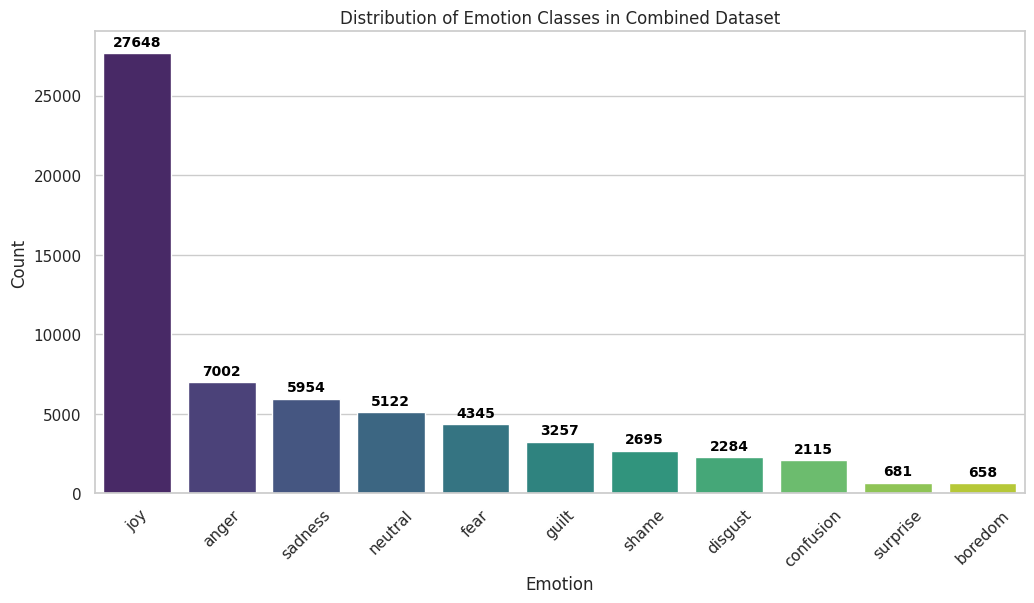

In [ ]:
# Plotting the distribution of classes in the combined dataset with count labels
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=combined_df, x='EMOTION', order=combined_df['EMOTION'].value_counts().index, palette='viridis')
plt.title("Distribution of Emotion Classes in Combined Dataset")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 8),
                textcoords = 'offset points',
                fontsize=10, color='black', weight='bold')

plt.show()

In [ ]:
print("\n--- Null Values in combined_df.csv ---")
print(combined_df.isnull().sum())


--- Null Values in combined_df.csv ---
EMOTION         0
cleaned_text    0
dtype: int64


## Print unique values in the 'EMOTION' column

In [ ]:
unique_emotions = combined_df['EMOTION'].unique()
print("Unique values in the 'EMOTION' column:")
print(unique_emotions)

Unique values in the 'EMOTION' column:
['joy' 'fear' 'anger' 'sadness' 'disgust' 'shame' 'guilt' 'boredom'
 'surprise' 'neutral' 'confusion']


# Step 4: Split the Data into Train and Test Sets

In [ ]:
# Assuming `combined_df` is the dataframe with columns 'EMOTION' and 'cleaned_text'
X = combined_df['cleaned_text']
y = combined_df['EMOTION']

# Split into train and test sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Text Vectorization using TF-IDF

In [ ]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed

# Fit and transform the train set, transform the test set
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


# Step 6: Train and Evaluate Models

### Emotion Labels

In [ ]:
# Define emotion labels as unique values from the 'EMOTION' column
emotion_labels = combined_df['EMOTION'].unique()

# Convert the array to a list
emotion_labels_list = emotion_labels.tolist()

# Print the defined emotion labels
print("Defined Emotion Labels:")
print(emotion_labels_list)


Defined Emotion Labels:
['joy', 'fear', 'anger', 'sadness', 'disgust', 'shame', 'guilt', 'boredom', 'surprise', 'neutral', 'confusion']


In [ ]:
# Define emotion labels as unique values from the 'EMOTION' column
emotion_labels = combined_df['EMOTION'].unique()
emotion_labels_list = emotion_labels.tolist()

# Initialize a dictionary to store accuracies
accuracies = {}

# Function to train, evaluate, and store accuracy of models
def train_and_evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_tfidf)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

    # Print model performance metrics
    print(f"\n--- {model_name} Performance ---")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred, model_name)

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 7))
    # Create a mask for the diagonal
    mask = np.eye(*cm.shape, dtype=bool)

    # Plot heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels, cbar=False)

    # Overlay diagonal elements with a different color
    for i in range(cm.shape[0]):
        plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, fill=False, edgecolor='orange', lw=2))

    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Initialize each model
log_reg = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

## Logistic Regression


--- Logistic Regression Performance ---
Accuracy: 0.5716829919857525
Classification Report:
               precision    recall  f1-score   support

       anger       0.65      0.45      0.53      1403
     boredom       0.62      0.23      0.33       124
   confusion       0.55      0.06      0.11       438
     disgust       0.58      0.21      0.31       451
        fear       0.56      0.21      0.30       839
       guilt       0.52      0.14      0.22       690
         joy       0.56      0.92      0.69      5526
     neutral       0.70      0.50      0.58      1018
     sadness       0.51      0.27      0.36      1172
       shame       0.59      0.17      0.26       572
    surprise       0.46      0.23      0.30       120

    accuracy                           0.57     12353
   macro avg       0.57      0.31      0.36     12353
weighted avg       0.58      0.57      0.52     12353



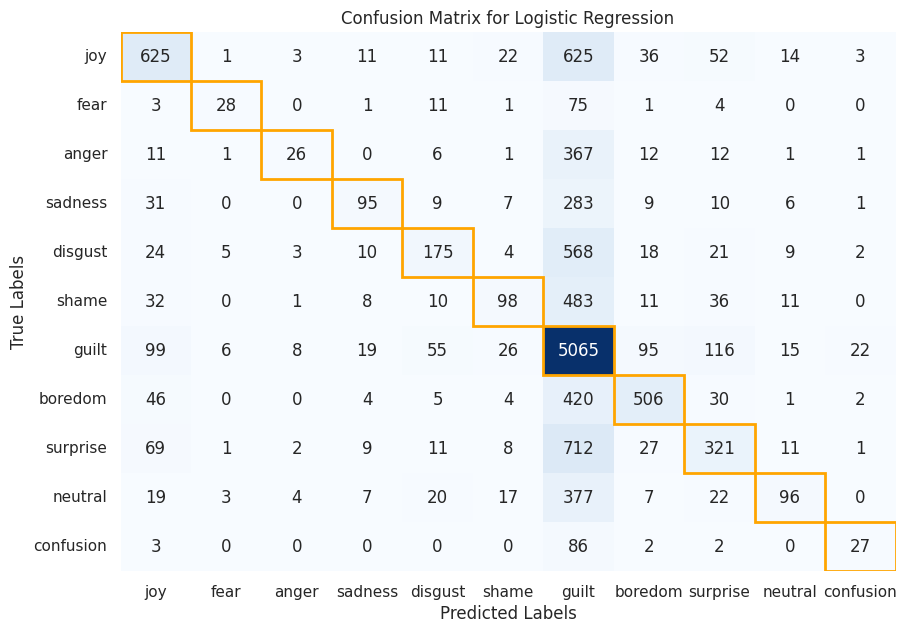

In [ ]:
# Train and evaluate Logistic Regression
train_and_evaluate_model(log_reg, "Logistic Regression")

## Naive Bayes


--- Naive Bayes Performance ---
Accuracy: 0.5032785558164009


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

       anger       0.73      0.23      0.35      1403
     boredom       0.00      0.00      0.00       124
   confusion       1.00      0.00      0.00       438
     disgust       0.84      0.05      0.09       451
        fear       0.81      0.08      0.15       839
       guilt       0.65      0.04      0.08       690
         joy       0.48      0.99      0.65      5526
     neutral       0.82      0.19      0.31      1018
     sadness       0.60      0.06      0.11      1172
       shame       0.79      0.05      0.10       572
    surprise       0.00      0.00      0.00       120

    accuracy                           0.50     12353
   macro avg       0.61      0.16      0.17     12353
weighted avg       0.62      0.50      0.39     12353



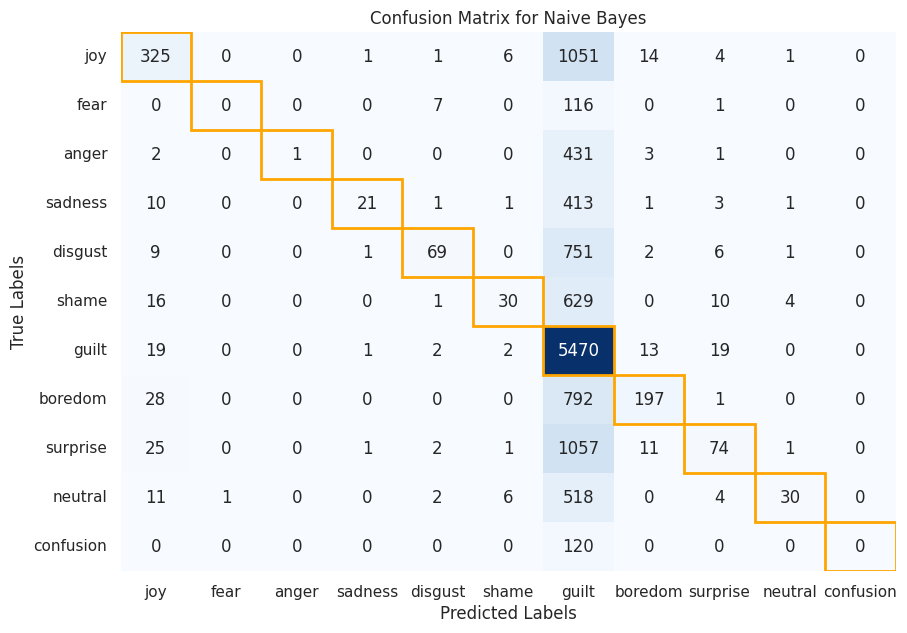

In [ ]:
# Train and evaluate Naive Bayes
train_and_evaluate_model(naive_bayes, "Naive Bayes")

## Random Forest


--- Random Forest Performance ---
Accuracy: 0.5690925281308185
Classification Report:
               precision    recall  f1-score   support

       anger       0.66      0.45      0.53      1403
     boredom       0.60      0.35      0.45       124
   confusion       0.38      0.05      0.08       438
     disgust       0.58      0.20      0.29       451
        fear       0.60      0.20      0.30       839
       guilt       0.50      0.12      0.19       690
         joy       0.56      0.90      0.69      5526
     neutral       0.64      0.53      0.58      1018
     sadness       0.50      0.32      0.39      1172
       shame       0.63      0.17      0.27       572
    surprise       0.44      0.30      0.36       120

    accuracy                           0.57     12353
   macro avg       0.55      0.33      0.38     12353
weighted avg       0.57      0.57      0.52     12353



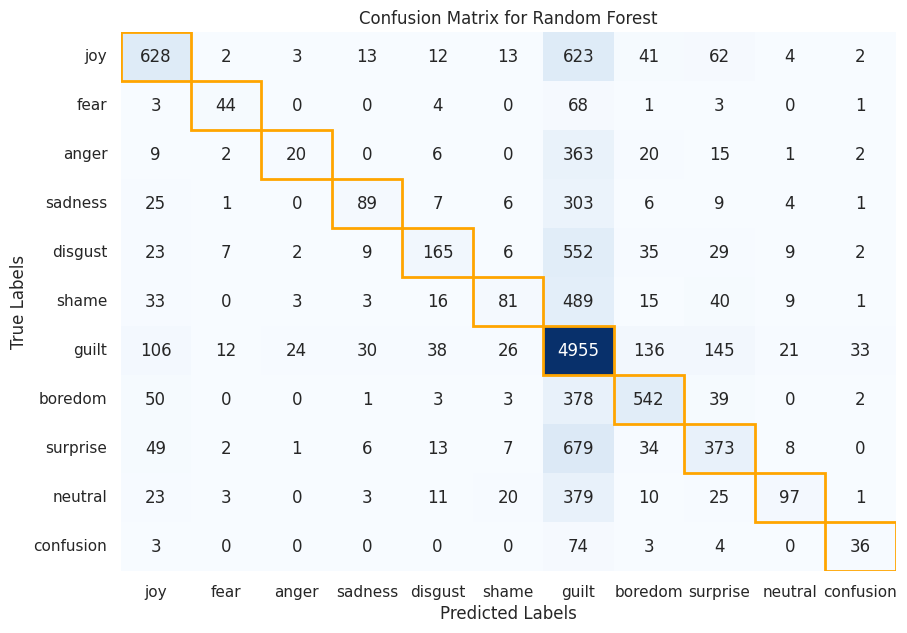

In [ ]:
# Train and evaluate Random Forest
train_and_evaluate_model(random_forest, "Random Forest")

## Decision Tree


--- Decision Tree Performance ---
Accuracy: 0.4665263498745244
Classification Report:
               precision    recall  f1-score   support

       anger       0.47      0.44      0.45      1403
     boredom       0.38      0.33      0.35       124
   confusion       0.15      0.10      0.12       438
     disgust       0.26      0.22      0.24       451
        fear       0.24      0.20      0.22       839
       guilt       0.19      0.12      0.15       690
         joy       0.57      0.67      0.62      5526
     neutral       0.53      0.50      0.52      1018
     sadness       0.32      0.30      0.31      1172
       shame       0.25      0.19      0.21       572
    surprise       0.24      0.24      0.24       120

    accuracy                           0.47     12353
   macro avg       0.33      0.30      0.31     12353
weighted avg       0.44      0.47      0.45     12353



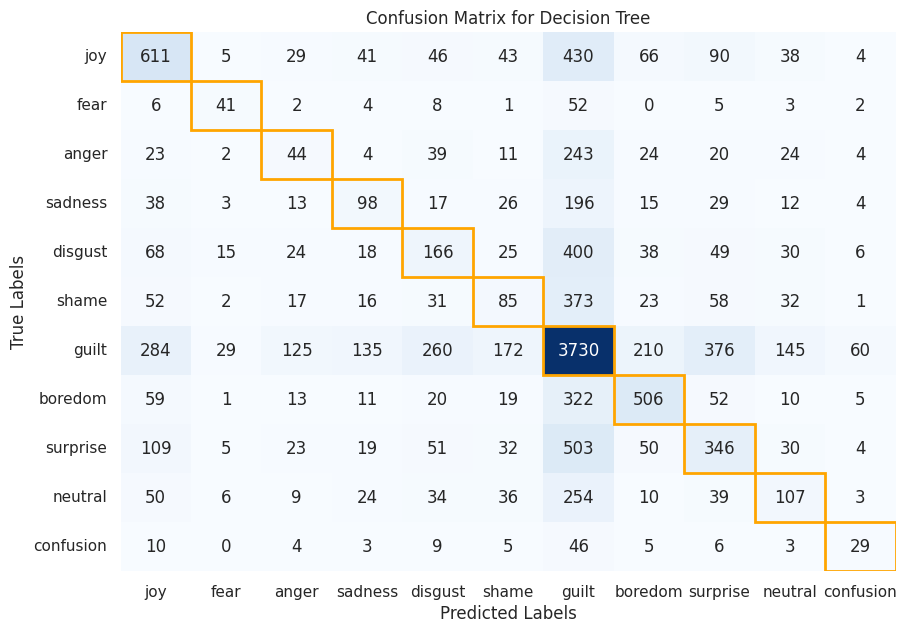

In [ ]:
# Train and evaluate Decision Tree
train_and_evaluate_model(decision_tree, "Decision Tree")

# Step 7: Compare accuracies

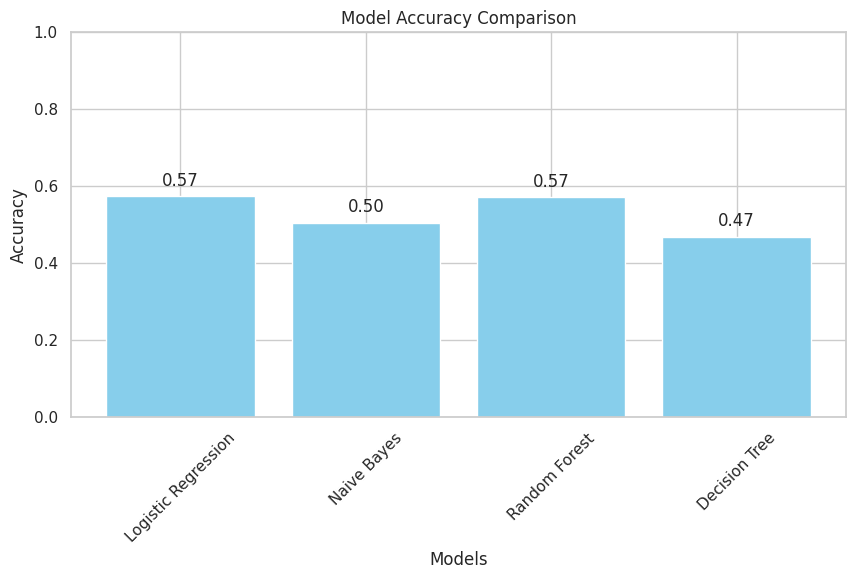

In [ ]:
# Compare accuracies
plt.figure(figsize=(10, 5))
bars = plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')

plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.xticks(rotation=45)

# Add value labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f"{yval:.2f}", ha='center', va='bottom')

plt.show()